In [1]:
import os
import gcsfs
import xarray as xr
import intake

## Read data from my Google Cloud Storage

In [8]:
# Define cloud file system access point:
fs = gcsfs.GCSFileSystem(project='poised-honor-358', token='anon', access='read_only')
# fs.ls('sonific01/')
# fs.ls('sonific01/ARGO')
fs.ls('sonific01/NATL12')

['sonific01/NATL12/GSbox-NATL12-BAMT20_0306_gridT_NA.zarr/',
 'sonific01/NATL12/GSbox-NATL12-BAMT20_0306_gridT_NA.nc']

In [11]:
# Load a dataset:
# gcsmap = gcsfs.mapping.GCSMap('sonific01/ARGO/Global_Argo_VerticalMean_Temperature.zarr', gcs=fs)
gcsmap = gcsfs.mapping.GCSMap('sonific01/NATL12/GSbox-NATL12-BAMT20_0306_gridT_NA.zarr', gcs=fs)
ds = xr.open_zarr(gcsmap)
# print(ds.nbytes/1e9)
print(ds)

<xarray.Dataset>
Dimensions:       (deptht: 36, time_counter: 292, x: 127, y: 254)
Coordinates:
  * deptht        (deptht) float32 3.0155573 9.147512 ... 942.2162 1040.7183
    nav_lat       (y, x) float32 dask.array<shape=(254, 127), chunksize=(254, 127)>
    nav_lon       (y, x) float32 dask.array<shape=(254, 127), chunksize=(254, 127)>
  * time_counter  (time_counter) datetime64[ns] 2003-04-10 ... 2006-08-22
Dimensions without coordinates: x, y
Data variables:
    iowaflup      (time_counter, y, x) float32 dask.array<shape=(292, 254, 127), chunksize=(73, 64, 32)>
    sohefldo      (time_counter, y, x) float32 dask.array<shape=(292, 254, 127), chunksize=(73, 64, 32)>
    solhflup      (time_counter, y, x) float32 dask.array<shape=(292, 254, 127), chunksize=(73, 64, 32)>
    solwfldo      (time_counter, y, x) float32 dask.array<shape=(292, 254, 127), chunksize=(73, 64, 32)>
    somxl010      (time_counter, y, x) float32 dask.array<shape=(292, 254, 127), chunksize=(73, 64, 32)>
    sos

In [4]:
# Load another dataset:
gcsmap = gcsfs.mapping.GCSMap('sonific01/ARGO/GLOB_HOMOGENEOUS_variables.zarr', gcs=fs)
ds = xr.open_zarr(gcsmap)
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 302, N_PROF: 128910)
Coordinates:
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1495.0 -1500.0 -1505.0
    LATITUDE   (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(128910,), chunksize=(64455,)>
Dimensions without coordinates: N_PROF
Data variables:
    BRV2       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(128910,), chunksize=(67010,)>
    PSAL       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    SIG0       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    TEMP       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
Attributes:
    Title:             VENTHSAL-IA
    conventions:       CF-1.6
    con

## Use intake catalog of my data

The catalog also uses the gcsfs entry point, but with intake it's transparent to the user:

In [2]:
catalog_url = 'https://raw.githubusercontent.com/obidam/m2poc2019/master/m2poc_data_catalog.yml'
cat = intake.Catalog(catalog_url)

In [3]:
ds = cat.argo_global_homogeneous_sdl.read_chunked()
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 302, N_PROF: 128910)
Coordinates:
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1495.0 -1500.0 -1505.0
    LATITUDE   (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(128910,), chunksize=(67010,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(128910,), chunksize=(64455,)>
Dimensions without coordinates: N_PROF
Data variables:
    BRV2       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(128910,), chunksize=(67010,)>
    PSAL       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    SIG0       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
    TEMP       (N_PROF, DEPTH) float32 dask.array<shape=(128910, 302), chunksize=(67010, 302)>
Attributes:
    Title:             VENTHSAL-IA
    conventions:       CF-1.6
    con

In [13]:
# Browse the data catalog:
gui = intake.DataBrowser()
catalog_url = '../../../m2poc_data_catalog.yml'
gui.add_cat(catalog_url)
# gui.add_cat('https://github.com/pangeo-data/pangeo/raw/master/gce/catalog.yaml')
gui

Intake GUI instance: to get widget to display, you must install ipy/jupyter-widgets, run in a notebook and, in the case of jupyter-lab, install the jlab extension.

In [5]:
# Once you selected a dataset from the browser, you can load it:
print(gui.item.describe_open()['description'])
ds = gui.item.to_dask()
print(ds)

North Atlantic ISAS15 temperature field in zarr format
<xarray.Dataset>
Dimensions:    (depth: 152, latitude: 67, longitude: 91, time: 168)
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0 10.0 ... 1940.0 1960.0 1980.0 2000.0
  * latitude   (latitude) float32 25.151031 25.602783 ... 50.3791 50.696884
  * longitude  (longitude) float32 285.0 285.5 286.0 286.5 ... 329.0 329.5 330.0
  * time       (time) datetime64[ns] 2002-01-15 2002-02-15 ... 2015-12-15
Data variables:
    temp       (time, depth, latitude, longitude) float32 dask.array<shape=(168, 152, 67, 91), chunksize=(42, 38, 17, 23)>


## Read data from Pangeo Google Cloud Storage

In [14]:
# Define cloud file system access point:
fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')
fs.ls('pangeo-data')

['pangeo-data/avhrr-patmos-x-cloudprops-noaa-asc-fc_TESTING3/',
 'pangeo-data/rsignell/',
 'pangeo-data/SDO_AIA_Images/',
 'pangeo-data/model_vars_5day_av_zarr/',
 'pangeo-data/trmm_3b42rt/',
 'pangeo-data/cm2.6/',
 'pangeo-data/FIB-25/',
 'pangeo-data/test997/',
 'pangeo-data/dataset-duacs-rep-global-merged-allsat-phy-l4-v3-alt/',
 'pangeo-data/neurofinder/',
 'pangeo-data/GEOS_V2p1/',
 'pangeo-data/gmet_v1.zarr/',
 'pangeo-data/landsat8/',
 'pangeo-data/test/',
 'pangeo-data/argo_test/',
 'pangeo-data/llc4320/',
 'pangeo-data/avhrr-patmos-x-cloudprops-noaa-asc-fc_TESTING4/',
 'pangeo-data/storage-benchmarks/',
 'pangeo-data/ecco/',
 'pangeo-data/GEOS_V2p1_L/',
 'pangeo-data/pyqg/',
 'pangeo-data/gaia_dr2.parquet/',
 'pangeo-data/CMIP5-ts/',
 'pangeo-data/channel/',
 'pangeo-data/kai-llc4320-vertical-fluxes/',
 'pangeo-data/polar/',
 'pangeo-data/grfn-hawaii-124-cog/',
 'pangeo-data/test998/',
 'pangeo-data/gpm_imerg_early/',
 'pangeo-data/NOAA_buoydata.parquet/',
 'pangeo-data/SLaPS/

In [15]:
### Load full AVISO Altimetry record
gcsmap = gcsfs.mapping.GCSMap('pangeo-data/dataset-duacs-rep-global-merged-allsat-phy-l4-v3-alt', gcs=fs)
ds = xr.open_zarr(gcsmap)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(8901, 720, 2), chunksize=(5, 720, 2)>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    sla        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    ugos       (time, latitude, longitude) float64 dask.array<shape=(8901,

## Or, again, use the Pangeo catalog

In [17]:
catalog_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo/master/gce/catalog.yaml'
cat = intake.Catalog(catalog_url)
ds = cat.sea_surface_height.read_chunked()
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<shape=(8901, 720, 2), chunksize=(5, 720, 2)>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    err        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    sla        (time, latitude, longitude) float64 dask.array<shape=(8901, 720, 1440), chunksize=(5, 720, 1440)>
    ugos       (time, latitude, longitude) float64 dask.array<shape=(8901,

## Now, only access required data

CPU times: user 37 ms, sys: 2 ms, total: 39 ms
Wall time: 39.7 ms
<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
dask.array<shape=(720, 1440), dtype=float64, chunksize=(720, 1440)>
Coordinates:
    crs        int32 ...
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
    time       datetime64[ns] 2009-02-12
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m


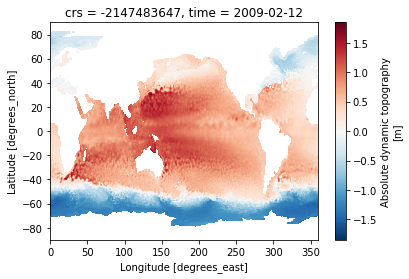

In [12]:
# Load and plot a map
%matplotlib inline
%time sla = ds['adt'].sel(time='2009-02-12', method='nearest')
print(sla)
sla.plot()

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 97.1 ms
<xarray.DataArray 'adt' (time: 8901)>
dask.array<shape=(8901,), dtype=float64, chunksize=(5,)>
Coordinates:
    crs        int32 ...
    latitude   float32 30.125
    longitude  float32 305.125
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m


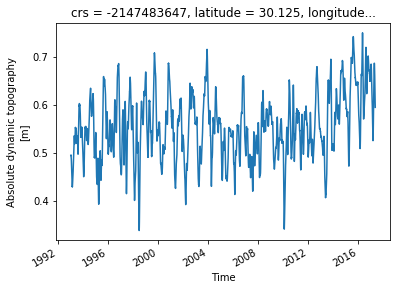

In [11]:
# Load and plot a time series
# (this slicing is much longer !)
%time sla = ds['adt'].sel(latitude=30, method='nearest').sel(longitude=360-55, method='nearest')
print(sla)
sla.plot()